### In this notebook, data has been upsampled using SMOTE technique:

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import random
import numpy as np
import math

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [18]:
# from google.colab import drive
# drive.mount('/content/drive')

In [19]:
#load the clean data 
# df = pd.read_csv("/content/drive/My Drive/Springbaord/capston 2 project/data/bc_data_cleaned.csv")
df = pd.read_csv('../data/bc_data_cleaned_labeled.csv')
df.head()

,Tumor Size,Regional Node Examined,Reginol Node Positive,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage_T2,...,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Grade II,Grade_Grade III,Grade_anaplastic,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status
0,40,19,11,1,0,1,0,0,0,1,...,0,0,1,1,0,0,1,1,1,0
1,45,25,9,1,0,1,0,0,0,1,...,1,0,0,1,0,0,1,1,1,0
2,25,4,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,1,1,1,1
3,19,26,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1,1
4,35,21,5,0,1,1,0,0,0,1,...,1,0,0,1,0,0,1,1,1,1


In [20]:
#devide the dataset to features and target
X = df.drop('Status',axis = 1)
y = df[['Status']]


In [21]:
#devide the data to test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

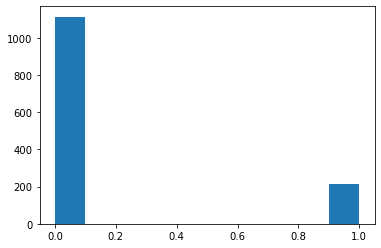

In [22]:
plt.hist(y_test);

In [23]:
#run random forest classification on the data 
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

<ipython-input-23-60222b61d643>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.8125

In [24]:
confusion_matrix(y_test, clf.predict(X_test))

array([[1031,   82],
       [ 167,   48]])

As seen the number of false negative is high in above dataset, its around 77% wrong prediction for dead prediction. T
Therefore we will use SMOTE model to genrate and upsample the minor class in out target dataset. 

In [25]:
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X, y)

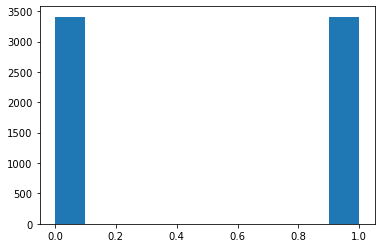

In [26]:
plt.hist(y_smote);

As seen in above histogram the taget has balanced distribuation.

In [27]:
#devide the new upsampled data to train and test
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote, test_size=0.33, random_state=41)

In [28]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train_smote, y_train_smote)
clf.score(X_test_smote, y_test_smote)

<ipython-input-28-671464ba92e8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_smote, y_train_smote)


0.8475555555555555

We got a better score comparing to out dataset without any synthetic data.

In [13]:
confusion_matrix(y_test_smote, clf.predict(X_test_smote))

array([[978, 158],
       [171, 943]])

As seen in the confusion matrix the number of false negative decreased and not, the wrong prediction is around 15%.

In [14]:
synthetic_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)],axis = 1)

In [15]:
synthetic_data.tail()

,Tumor Size,Regional Node Examined,Reginol Node Positive,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed,T Stage_T2,...,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Grade II,Grade_Grade III,Grade_anaplastic,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status
6811,50,16,15,0,1,1,0,0,0,0,...,0,0,1,0,0,0,1,1,0,1
6812,50,18,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6813,60,12,2,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,1,1
6814,35,21,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
6815,34,21,16,0,1,1,0,0,0,1,...,0,0,1,0,1,0,1,0,0,1


In [16]:
# fpath = '/content/drive/My Drive/Springbaord/capston 2 project/data/bc_data_synthetic.csv'
fpath = '../data/bc_data_synthetic.csv'
synthetic_data.to_csv(fpath, index=False)